## Model Testing

In [1]:
import torch
import numpy

from torch.utils.data import DataLoader

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from src.data.transforms import Transforms
from src.data.dataset import SkinDataset
from src.model.test import ModelTesting
from src.utils.config import Config

In [2]:
numpy.random.seed(1234)
torch.random.manual_seed(1324)

In [3]:
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

IMAGES_PATH = Config.get_path('images')
TEST_PATH = Config.get_path('test_csv')

MODEL_PATH = Config.get_path('model')

BATCH_SIZE = Config.get_setting_int('batch_size')
NUM_EPOCHS = Config.get_setting_int('num_epochs')
NUM_WORKERS = Config.get_setting_int('num_workers')

In [4]:
load = Transforms.get_data_loading()

testset = SkinDataset('C:/Users/UX534/ISIC-2019-v2/data/images/', 'C:/Users/UX534/ISIC-2019-v2/data/processed/ISIC_2019_dataset_test.csv', load)
test_loader = DataLoader(testset, batch_size=BATCH_SIZE, shuffle=True, num_workers=NUM_WORKERS, pin_memory=True)

model = ModelTesting(DEVICE, 'C:/Users/UX534/ISIC-2019-v2/models/model_weights.pth')
model.load()
y_pred, y_true = model.test(test_loader)

100%|██████████████████████████████████████████████████████████████████████████████████| 23/23 [00:22<00:00,  1.00it/s]


Test Accuracy: 0.7589


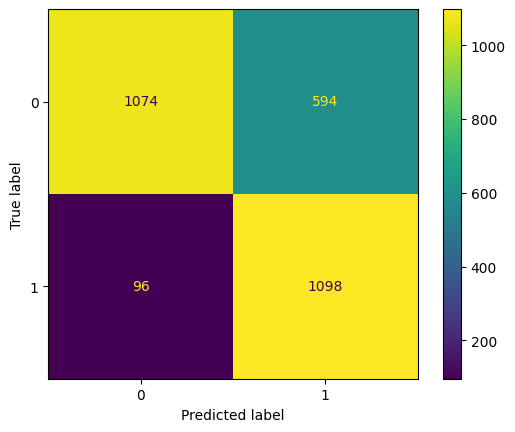

In [5]:
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

print('Test Accuracy: %0.4f' % accuracy_score(y_true, y_pred))